# Исследование данных об играх

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и планируется кампания на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Цель исследования**

Отработать принцип работы с данными. Выявить определяющие успешность игры закономерности.

**Ход работы**

Для начала будет произведен обзор данных, затем предобработка данных: здесь нужно будет посмотреть на общий вид датафрейма, привести его к корректному виду, заполнить или убрать пропуски по возможности, обработать дубликаты и т.д. Во время исследовательского анализа данных нужно будет проанализировать данные за весь период и выявить актуальный, проанализировать продажи на крупных платформах, выявить потенциально прибыльные платформы; узнать, существует ли зависимость между продажами и отзывами, между продажами и жанрами игр. Затем следует проверить выдвинутые гипотезы и сделать общий вывод.

**План работы**

[***Шаг 1. Обзор данных***](#1)

[***Шаг 2. Предобработка данных***](#2)

[***Шаг 3. Исследовательский анализ данных***](#3)

[***Шаг 4. Проверка гипотез***](#4)

[***Шаг 5. Общий вывод***](#5)


<a id ='1'></a>
## Обзор данных

In [1]:
# импорт библиотек
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
# отключение предупреждений
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
# считывание файла в дф
data = pd.read_csv('/datasets/games.csv')

In [3]:
# функция для описания дф
def df_info(df):
    display(df.head(10))
    df.info()
    display(df.duplicated().sum())

Изучим общую информацию о данных

In [4]:
df_info(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


0

Построим графики для числовых столбцов датафрейма

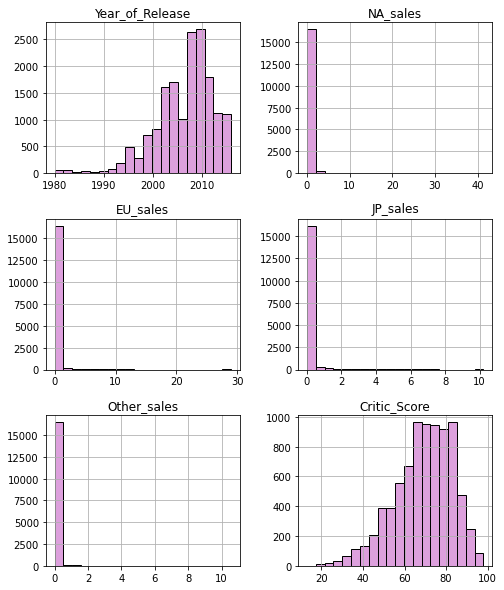

In [5]:
data.hist(figsize=(8,10), bins=20, color='plum', ec='black');

Изучив информацию о данных, отметим основные моменты:
- всего строк в датафрейме 16715, столбцов - 11;
- названия столбцов нужно привести к snake_case;
- в столбцах `Name`, `Year_of_Release`,`Genre`, `Critic_Score`, `User_Score`, `Rating` присутствуют пропуски, стоит обратить на них внимание во время предобработки данных;
- явные дубликаты отсутствуют;
- стоит изменить тип данных у некоторых столбцов;
- распределения данных `Year_of_Release` и `Critic_Score` выглядят вполне адекватно;
- распределения данных о продажах в разных регионах имеют длинные "хвосты", стоит обратить на них внимание при дальнейшем исследовании.

<a id ='2'></a>
## Предобработка данных

### Названия столбцов

Названия столбцов датафрейма следует заменить: привести к snake_case.

In [6]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Дубликаты

Проверим явные дубликаты по всему датафрейму

In [7]:
# проверка на явные дубликаты
data.duplicated().sum()

0

Явных дубликатов по всему датафрейму не обнаружено, поэтому проверим дубликаты только по трем столбцам с главной информацией об игре: название, платформа, год выпуска, так как одна и та же игра может выходить в разные годы на разных платформах, но поплучать при этом разные рейтинги и продаваться по-разному.

In [8]:
# проверка на дубликаты по столбцам name, platform, year_of_release
data.duplicated(subset=['name', 'year_of_release', 'platform']).sum()

2

In [9]:
# посмотрим на дублирующие записи перед их удалением
data[data.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Удалим найденные дубликаты

In [10]:
# удаление дубликатов
data = data.drop_duplicates(subset=['name', 'year_of_release', 'platform'])
data.duplicated(subset=['name', 'year_of_release', 'platform']).sum()

0

Проверим на неявные дубликаты столбцы `genre` и `rating`

In [11]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Неявные дубликаты не обнаружены

### Пропуски

В столбцах `Name`, `Year_of_Release`,`Genre`, `Critic_Score`, `User_Score`, `Rating` присутствуют пропуски, которые следует обработать. 

Для начала посмотрим в каждом столбце количество пропусков, а также долю пропусков от общего количества строк

In [15]:
# количество пропусков
pd.DataFrame(data.isna().sum()).style.background_gradient(cmap='BuPu')

,0
name,1
platform,0
year_of_release,269
genre,1
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8577
user_score,6700


In [16]:
# доля пропусков в процентах
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient(cmap='BuPu')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Стоит отметить, что в столбцах `name`, `genre`, `year_of_release` небольшое количество пропусков (меньше 1.7%). Заменить эти пропуски невозможно, доля этих пропусков от общего количества данных мала, поэтому мы можем удалить пропуски в этих столбцах, на результат исследования это не повлияет.

In [17]:
# данные с пропусками в столбцах name, genre, year_of_release
data[(data['name'].isna()) | (data['year_of_release'].isna())].sort_values(by='na_sales', ascending=False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN


In [18]:
# убираем пропуски в данных
data = data[(~(data['name'].isna())) & (~(data['year_of_release'].isna()))]
# проверяем, удалились ли пропуски
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Большое количество пропусков наблюдается в столбцах `critic_score` и `user_score`.

Причины пропусков в этих столбцах могут быть следующие:
- некоторые игры могли быть выпущены до внедрения систем оценок критиков/пользователей;
- некоторые игры могли не получить достаточного внимания для оценки критиками/пользователями;
- данные об оценках критиков/пользователей могли быть утеряны/техническая ошибка при выгрузке данных.

Для уточнения причины появления пропусков можно было бы обратиться к коллегам, однако так как сейчас такой возможности не имеется, оставим пропуски так, как есть.

Пропусков в столбце `rating` значительное количество. Они могут быть вызваны следующими причинами:

- некоторые игры могли быть выпущены до создания системы рейтингов ESRB;
- для некоторых игр рейтинг мог быть просто не присвоен по различным причинам;
- данные о рейтинге могли быть утеряны/техническая ошибка при выгрузке данных.

Заполнять пропуски можно следующим образом:
- заменить пропуски на рейтинг RP ("Рейтинг ожидается").

In [19]:
# применяем функцию к исходному датафрейму
data['rating'] = data['rating'].fillna('RP')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

### Тип данных

**1. Столбец `user_score`**

In [20]:
# выводим уникальные значения столбца
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец `user_score` стоит привести к типу данных `float64` для удобства дальнейшей работы с данными. Однако мы не можем привести этот столбец к нужному типу данных из-за значения `tbd`. В описании данных сказано, что значения в столбце `user_score` могут быть от 0 до 10. Значение `tbd` означает, что оценка не определена, поэтому просто заменим значение `tbd` на `NaN` для удобства при дальнейшей работе с данными (построение графиков, арифметические операции и т.д.)

In [21]:
# заменяем tbd на nan и проверяем
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [22]:
# изменяем тип данных столбца на float и проверяем
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


**2. Столбец `year_of_release`**

Тип данных в столбце `year_of_release` стоит заменить на `int`, так как года в датафрейме представлены в целом выражении.

In [23]:
# изменяем тип данных столбца на int и проверяем
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Добавление столбца

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [24]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


**Вывод**

Во время предобработки данных было выполнено: 
- обработаны названия столбцов: названия приведены к нижнему регистру и snake_case;
- удалены дубликаты;
- обработаны пропуски там, где это было возможно: удалены пропуски в столбцах `name`, `year_of_release`, `genre`, заменены пропуски в столбце `rating` на `RP`, оставлены пропуски в столбцах `critic_score`, `user_score`:
- изменены типы данных в тех столбцах, в которых это было необходимо: столбец `year_of_release` с типом данных `int`, столбец `user_score` с типом данных `float`, столбец `rating` с типом данных `category`;
- добавлен новый столбец `total_sales` с данными о суммарных продажах во всех регионах.

In [25]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


<a id ='3'></a>
## Исследовательский анализ данных

### Выбор актуального периода

Посмотрим, сколько игр выпускалось в разные годы.

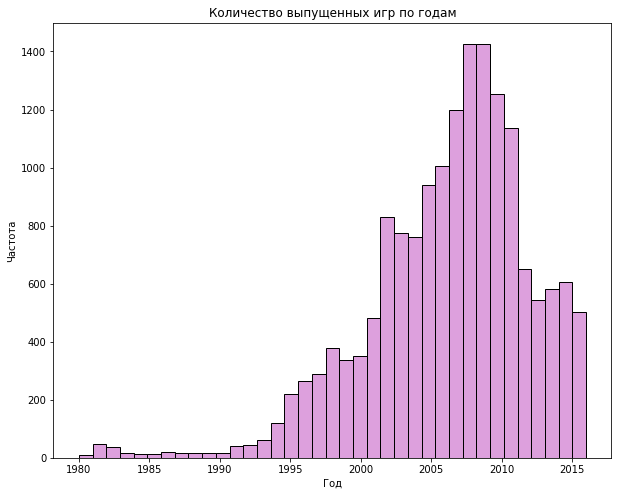

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [26]:
# строим график по столбцу year_of_release
data['year_of_release'].plot(kind='hist', figsize=(10,8), bins=37, color='plum',
                             ec='black', title='Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Частота')
plt.show()
# выводим описание данных
data['year_of_release'].describe()

По распределению и описанию данных можно заметить, что чаще всго игры выпускались в 2008-2010-х годах. Также стоит отметить, что данные о выпуске игр до 2003 года незначительные и они не так важны для исследования.


Рассмотрим платформы с наибольшими суммарными продажами

In [27]:
# 10 платформ с наибольшими суммарными продажами
top10_platform = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                  .sort_values(by='total_sales', ascending=False).head(10))
top10_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


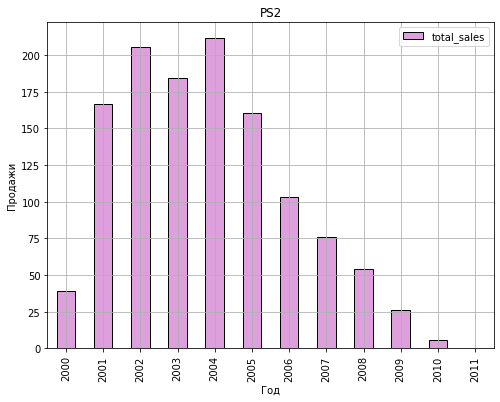

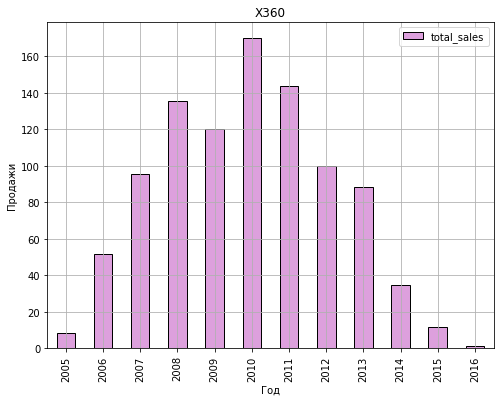

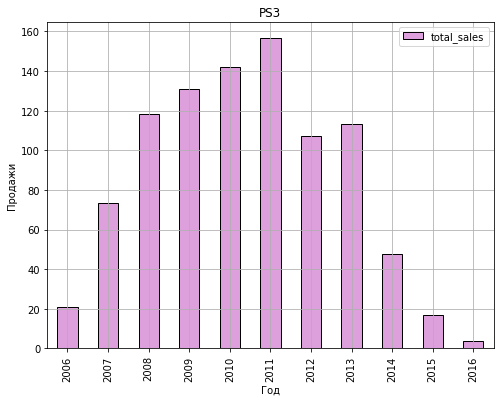

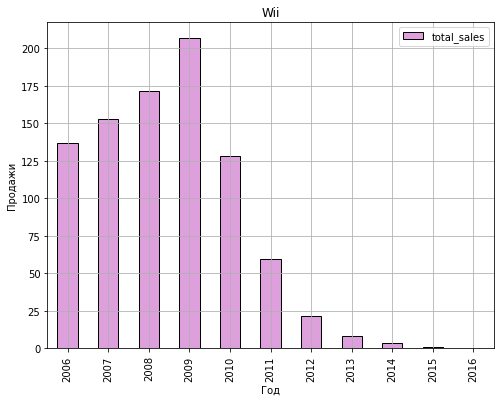

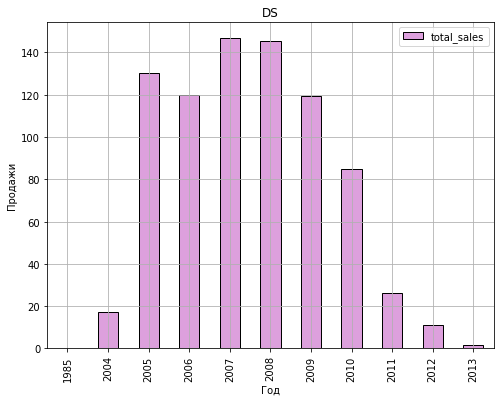

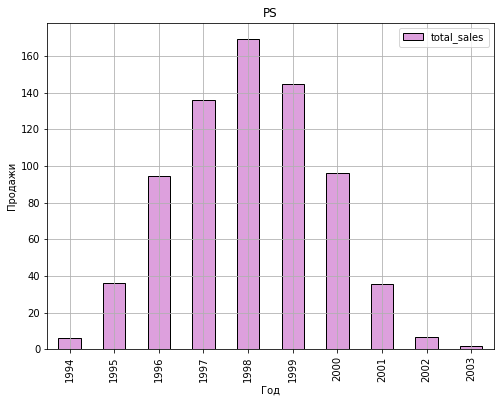

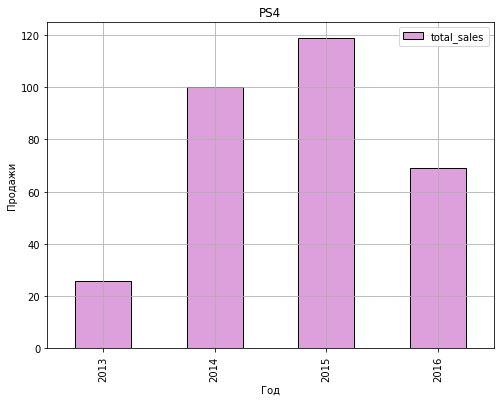

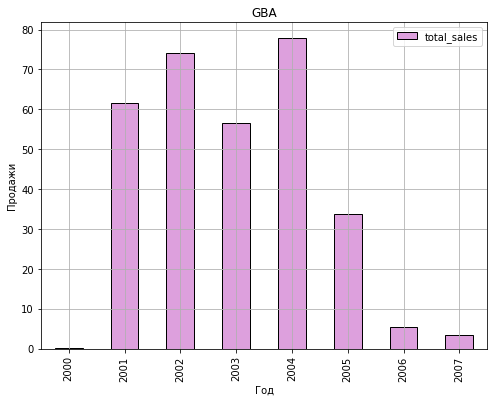

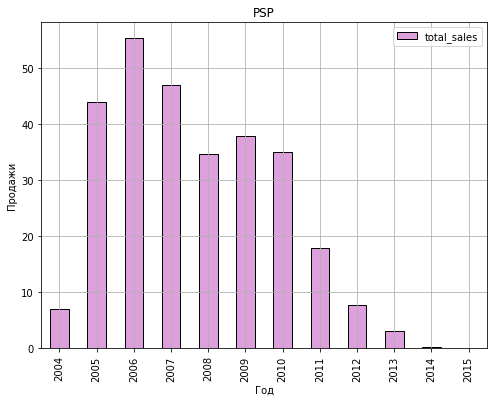

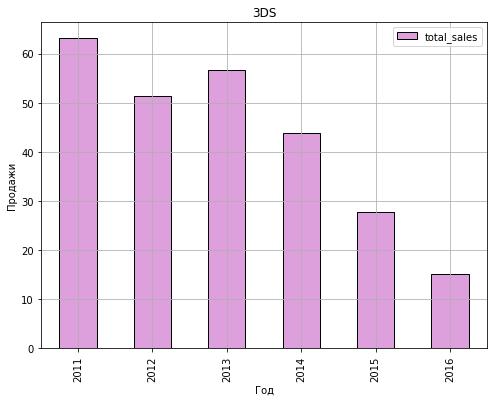

In [28]:
# строим распределения по годам для топ10 платформ
for platform in top10_platform.index:
    (data[data['platform']==platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', color='plum', ec='black', title=platform, figsize=(8,6), grid=True))
    plt.xlabel('Год')
    plt.ylabel('Продажи')

У платформы `DS` наблюдается аномалия: есть данные о выпуске игры на этой платформе в 1985 году, однако эта платформа была выпущена на рынок в 2004 году. Стоит удалить аномалию

In [29]:
# убираем аномалию
data = data[~((data['platform'] == 'DS') & (data['year_of_release'] == 1985))]
# проверяем, удалилась ли аномалия
data[data['platform']=='DS'].sort_values(by='year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,NaN,NaN,RP,0.43
13095,Tennis no Oji-Sama: 2005 Crystal Drive,DS,2004,Sports,0.00,0.00,0.05,0.00,NaN,NaN,RP,0.05
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,RP,0.08
6580,Polarium,DS,2004,Puzzle,0.13,0.01,0.11,0.01,73.0,8.4,E,0.26
14161,Puyo Pop Fever(us sales),DS,2004,Puzzle,0.03,0.00,0.00,0.00,NaN,NaN,RP,0.03


Рассмотрев 10 платформ с наиболее большими общими продажами игр в распределении продаж по годам, можно сделать вывод, что в среднем новые платформы появляются за 3-4 года, а старые платформы исчезают в среднем за 5-6 лет. При этом жизненный цикл платформы в среднем составляет 8 лет. 

Возьмем за актуальный период для прогнозирования продаж на 2017 год средний жизненный цикл платформы, поделенный на два (т.к. половину жизненного цикла платформы растут, половину падают), то есть актуальный период для анализа будет равен 4 годам (2012-2016 г.)

In [30]:
# создаем дф с актуальными данными за последние четыре года
data_act = data.query('year_of_release > 2012')
df_info(data_act)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,RP,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


0

### Анализ актуального периода

Посмотрим, какие платформы в актуальном периоде лидируют, какие растут, какие падают по глобальным продажам. На основе полученной информации выберем потенциально прибыльные платформы.

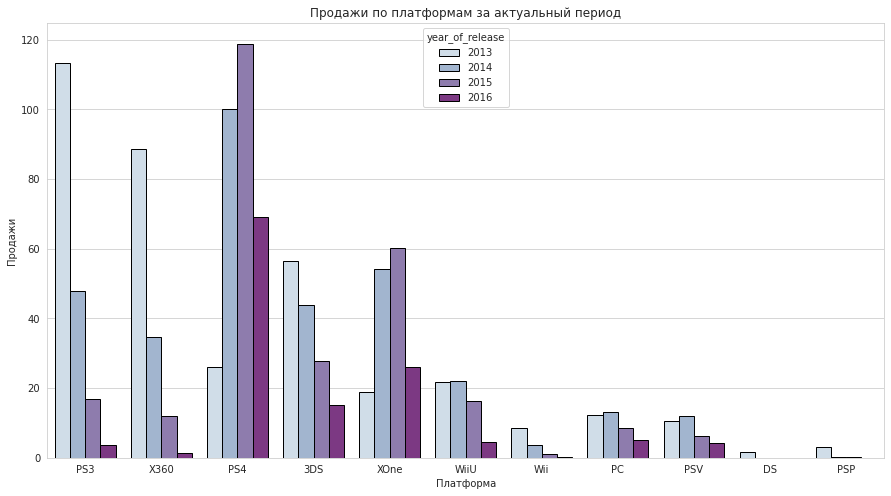

In [31]:
# зададим размер графику
plt.figure(figsize=(15,8))
# сетка для графика
sns.set_style('whitegrid')
# построим диаграмму продаж по платформам, с разделением по годам
sns.barplot(x='platform',
            y='total_sales',
            hue='year_of_release',
            data=data_act,
            estimator=sum,
            ci=None,
            palette='BuPu',
            ec='black'
)
# подписи для графика
plt.title('Продажи по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Из графика видно, что у платформы `PS4` лучшие суммарные продажи за рассматриваемый период. Из этого графика потенциально прибыльными платформами на 2016 год можно считать `PS4`, `XOne` и`3DS`.

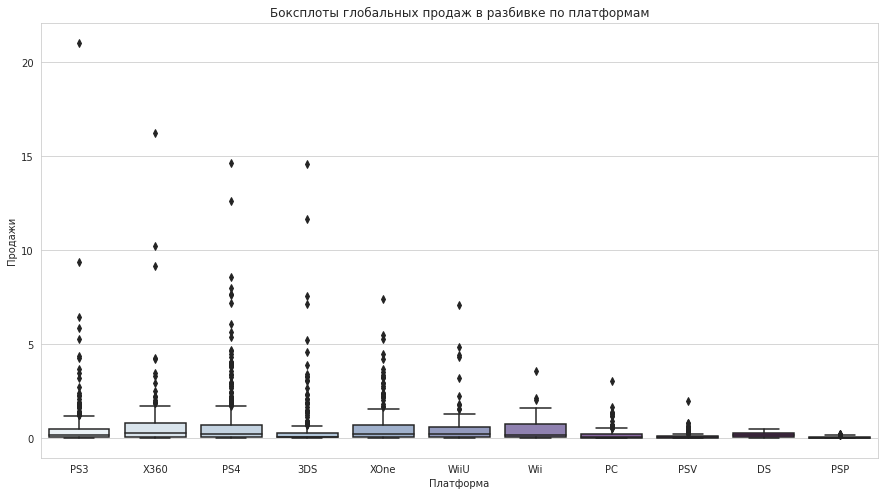

In [32]:
# зададим размер графику
plt.figure(figsize=(15,8))
sns.boxplot(x="platform",
            y="total_sales",
            palette='BuPu',
            data=data_act)
# подписи для графика
plt.title('Боксплоты глобальных продаж в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

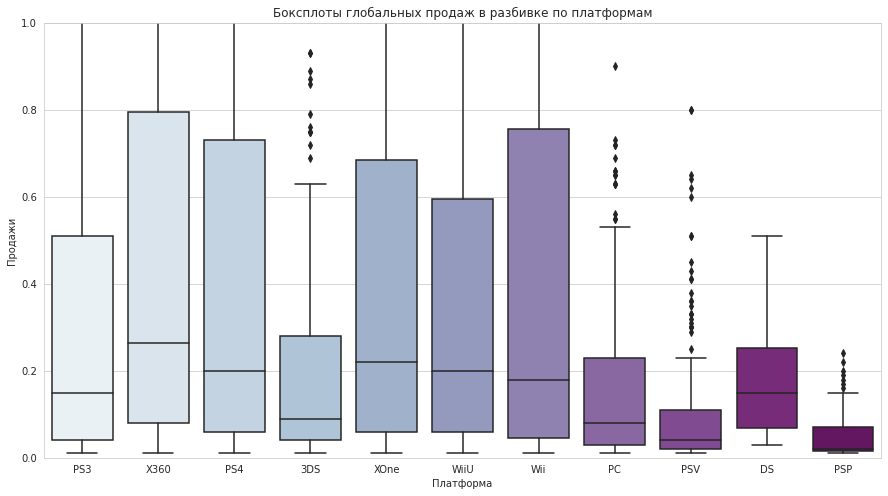

In [33]:
# зададим размер графику
plt.figure(figsize=(15,8))
sns.boxplot(x="platform",
            y="total_sales",
            palette='BuPu',
            data=data_act)
# ограничение масштаба графика
plt.ylim(0, 1)
# подписи для графика
plt.title('Боксплоты глобальных продаж в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Здесь можно отметить, что платформа `X360` обладает самыми высокими медианными продажами за рассматриваемый период, несмотря на то, что в 2015-2016 годах глобальные продажи этой платформы не входят в пятерку платформ с наиболее высокими продажами. Однако этой платформе в 2016 году уже исполнилось 11 лет и она с малой вероятностью может стать перспективной в 2017 году.

Самые низкие продажи у платформ `PSV` и `PSP`.

У всех платформ наблюдаются большие выбросы. Это связано с наличием игр-рекордсменов у некоторых платформ. Так, например, у платформ `3DS`, `PS4` наблюдается большое количество выбросов, что говорит о том, что эти платформы способны выпустить потенциально популярную игру. Также 30-тилетняя история персональных компьютеров говорит, что игры для `PC` можно включить в рекомендацию.

В итоге стоит отметить платформы `PS4`, `XOne`, `3DS`, `WiiU`, `PC` как потенциально прибыльные.

### Зависимость продаж от отзывов

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве рассматриваемой популярной платформы возьмем `PS4`.

In [34]:
data_ps4 = data_act[data_act['platform']=='PS4']
data_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,RP,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


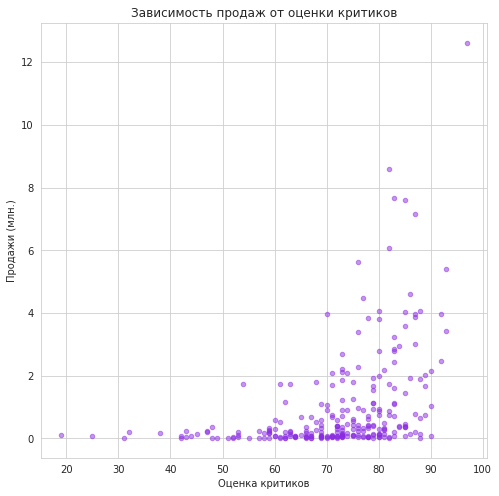

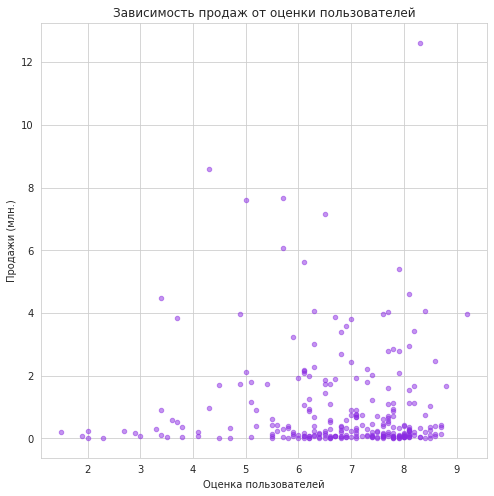

Коэффициент корреляции (оценка критиков): 0.41
Коэффициент корреляции (оценка пользователей): -0.03


In [35]:
# актуальные данные для платформы PS4
data_ps4 = data_act[data_act['platform']=='PS4']
# график зависимости продаж от оценок критиков на платформе PS4
data_ps4.plot(kind='scatter',
              x="critic_score",
              y="total_sales",
              alpha=.5,
              color='blueviolet',
              figsize=(8,8),
              title='Зависимость продаж от оценки критиков')
# подписи графику
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн.)')
plt.show()

# график зависимости продаж от оценок пользователей на платформе PS4
data_ps4.plot(kind='scatter',
              x="user_score",
              y="total_sales",
              alpha=.5,
              color='blueviolet',
              figsize=(8,8),
              title='Зависимость продаж от оценки пользователей')
# подписи графику
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн.)')
plt.show()
# коэффициенты корреляции для ps4
critic_corr = data_ps4['total_sales'].corr(data_ps4['critic_score'])
user_corr = data_ps4['total_sales'].corr(data_ps4['user_score'])
print(f'Коэффициент корреляции (оценка критиков): {round(critic_corr, 2)}')
print(f'Коэффициент корреляции (оценка пользователей): {round(user_corr, 2)}')

Зависимость продаж от оценок критиков средняя: можно заметить, что продажи значительно повышаются при оценках критиков выше 60. Наблюдаются и выбросы, однако закономерность все равно прослеживается: чем больше оценка критиков, тем больше продажи.

Зависимости продаж от оценок пользователей не наблюдается.

Рассмотрим несколько других крупных платформ для того, чтобы убедиться в этом

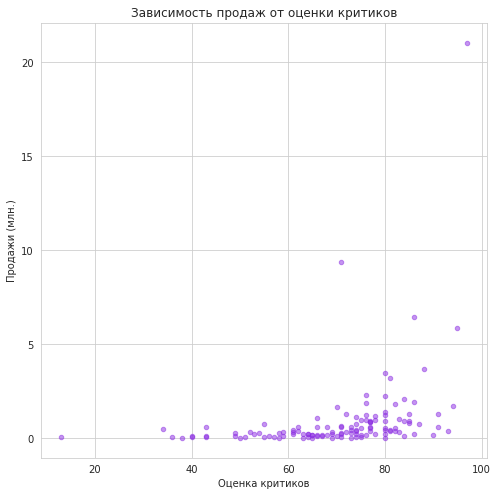

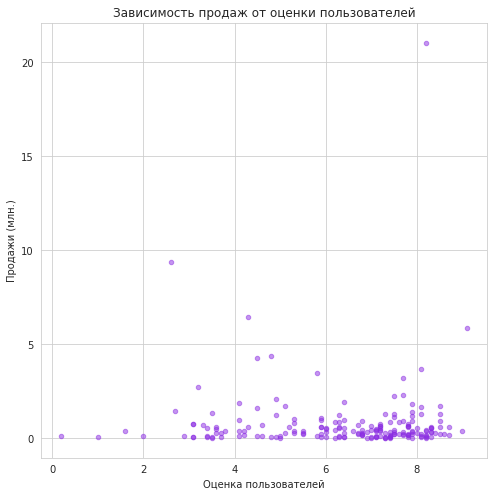

Коэффициент корреляции (оценка критиков): 0.33
Коэффициент корреляции (оценка пользователей): 0.0


In [36]:
# актуальные данные для платформы PS3
data_ps3 = data_act[data_act['platform']=='PS3']
# график зависимости продаж от оценок критиков на платформе PS3
data_ps3.plot(kind='scatter',
              x="critic_score",
              y="total_sales",
              alpha=.5,
              color='blueviolet',
              figsize=(8,8),
              title='Зависимость продаж от оценки критиков')
# подписи графику
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн.)')
plt.show()

# график зависимости продаж от оценок пользователей на платформе PS3
data_ps3.plot(kind='scatter',
              x="user_score",
              y="total_sales",
              alpha=.5,
              color='blueviolet',
              figsize=(8,8),
              title='Зависимость продаж от оценки пользователей')
# подписи графику
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн.)')
plt.show()
# коэффициенты корреляции для ps4
critic_corr = data_ps3['total_sales'].corr(data_ps3['critic_score'])
user_corr = data_ps3['total_sales'].corr(data_ps3['user_score'])
print(f'Коэффициент корреляции (оценка критиков): {round(critic_corr, 2)}')
print(f'Коэффициент корреляции (оценка пользователей): {round(user_corr, 2)}')

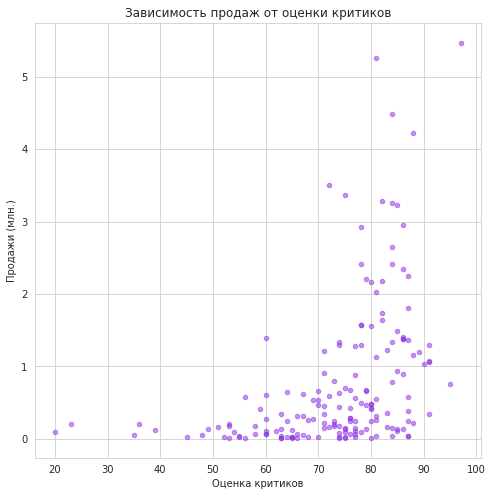

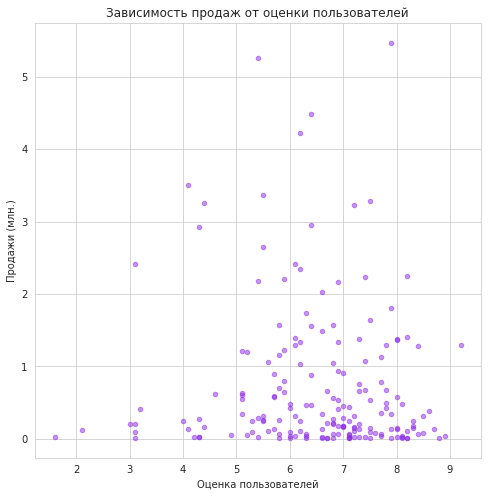

Коэффициент корреляции (оценка критиков): 0.42
Коэффициент корреляции (оценка пользователей): -0.07


In [37]:
# актуальные данные для платформы xone
data_xone = data_act[data_act['platform']=='XOne']
# график зависимости продаж от оценок критиков на платформе xone
data_xone.plot(kind='scatter',
              x="critic_score",
              y="total_sales",
              alpha=.5,
              color='blueviolet',
              figsize=(8,8),
              title='Зависимость продаж от оценки критиков')
# подписи графику
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн.)')
plt.show()

# график зависимости продаж от оценок пользователей на платформе xone
data_xone.plot(kind='scatter',
              x="user_score",
              y="total_sales",
              alpha=.5,
              color='blueviolet',
              figsize=(8,8),
              title='Зависимость продаж от оценки пользователей')
# подписи графику
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн.)')
plt.show()
# коэффициенты корреляции для xone
critic_corr = data_xone['total_sales'].corr(data_xone['critic_score'])
user_corr = data_xone['total_sales'].corr(data_xone['user_score'])
print(f'Коэффициент корреляции (оценка критиков): {round(critic_corr, 2)}')
print(f'Коэффициент корреляции (оценка пользователей): {round(user_corr, 2)}')

В общем, рассмотрев одни из крупнейших платформ, можно сделать вывод, что такие зависимости соблюдаются и для других платформ, то есть продажи зависят от оценок, но только от оценок критиков и зависимость эта невысокая. Вероятно, что пользователи при покупке игр ориентируются на что-то еще (жанр, возрастное ограничение, картинка, описание, популярность и т.д.)

### Зависимость продаж от жанра игр

Рассмотрим теперь продажи игр в зависимости от жанра: узнаем, какой самый прибыльный жанр, а какой жанр совсем не пользуется популярностью.

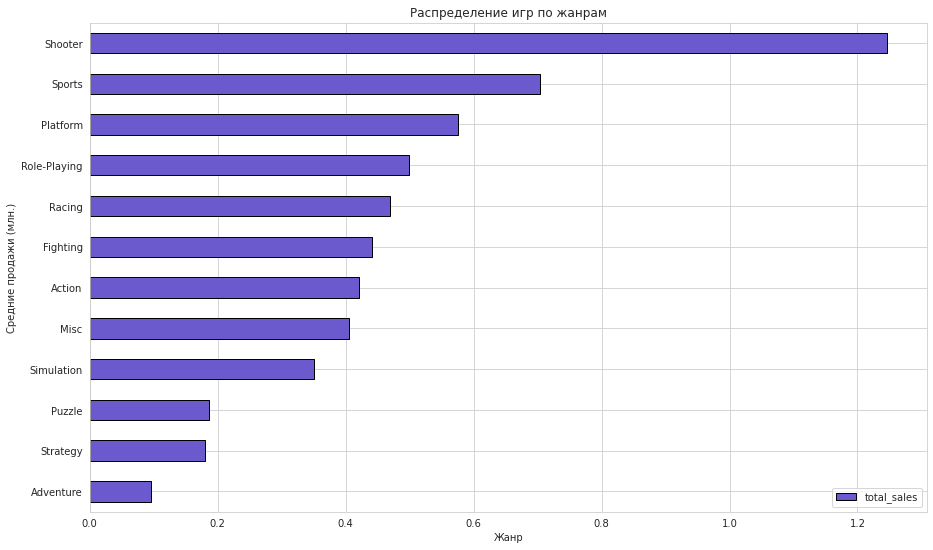

In [38]:
# создаем сводную таблицу продаж в зависимости от жанра, строим график
(data_act.pivot_table(index='genre', values='total_sales')
 .sort_values(by='total_sales', ascending=True)
 .plot(kind='barh', figsize=(15,9), color='slateblue', ec='black', title='Распределение игр по жанрам'))
# подписи для графика
plt.xlabel('Жанр')
plt.ylabel('Средние продажи (млн.)')
plt.show()

Проанализируем прибыльность жанров на диаграмме размаха, сравним медианные продажи на каждом жанре и проверим какой из них более стабилен и имеет более длинный ряд успешно продающихся игр

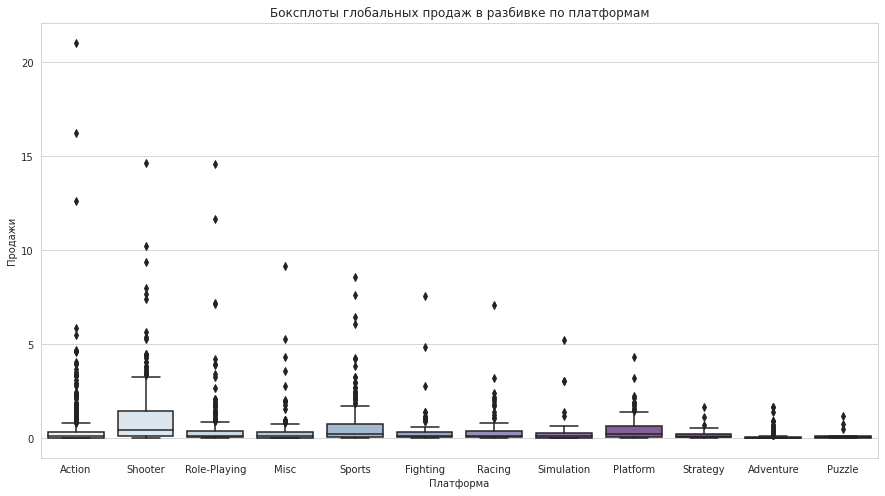

In [39]:
# зададим размер графику
plt.figure(figsize=(15,8))
sns.boxplot(x="genre",
            y="total_sales",
            palette='BuPu',
            data=data_act)
# подписи для графика
plt.title('Боксплоты глобальных продаж в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

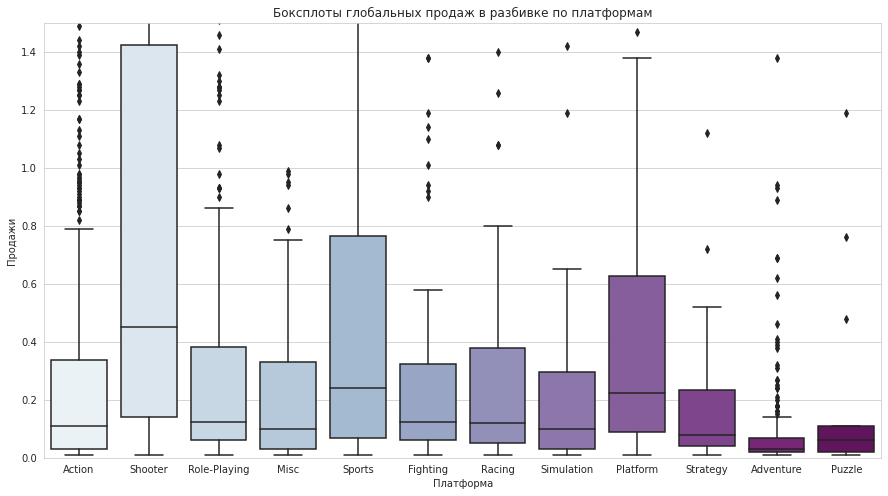

In [40]:
# зададим размер графику
plt.figure(figsize=(15,8))
sns.boxplot(x="genre",
            y="total_sales",
            palette='BuPu',
            data=data_act)
# ограничение масштаба графика
plt.ylim(0, 1.5)
# подписи для графика
plt.title('Боксплоты глобальных продаж в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

По графику можно заметить, что самый прибыльный жанр - `Shooter`(в среднем продажи игр в этом жанре более 1.2 млн. копий, медианные продажи более 400 тыс. копий), имеет длинный ряд успешно продающихся игр. На графиках заметны большие выбросы: более 20 млн. копий в жанре `Action`. Повлиять на это мог выход культовых игр в этом жанре в актуальном периоде. Также популярностью пользуются жанры `Sports` и `Platform`. 

Самые неприбыльные жанры это `Puzzle`, `Strategy` и `Adventure` (в среднем продажи игр в этих жанрах менее 200 тыс. копий). 

### Портрет пользователя каждого региона

Составим портрет типичного пользователя для каждого региона. 

Для этого определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияет ли рейтинг ESRB на продажи в отдельном регионе.

**Самые популярные платформы (топ-5)**

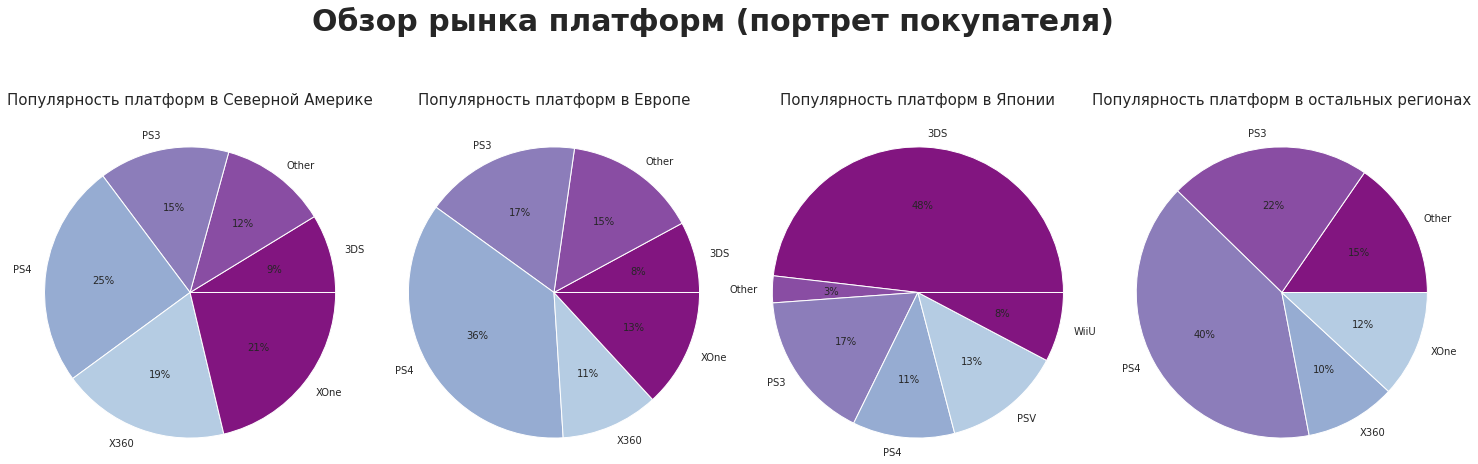

In [41]:
# создаем круговые диаграммы обзора рынка платформ для каждого региона
reg = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'] # регионы
reg_tit = ['Северной Америке', 'Европе', 'Японии', 'остальных регионах'] #названия регионов для подписей
# цвета, которые будут использованы в графике
colors = sns.color_palette('BuPu_r')[ 0:5 ]
fig, axs = plt.subplots(1, 3, figsize=(25,10)) # параметры графика
for i in range(len(reg)):
    # сводная таблица по нужным данным
    reg_data = data_act.groupby('platform').agg({reg[i]:'sum'}).reset_index()
    reg_data['perc'] = reg_data[reg[i]] / reg_data[reg[i]].sum()
    reg_data.loc[reg_data['perc']<=0.07, 'platform'] = 'Other'
    reg_data = reg_data.groupby('platform').agg({reg[i]:'sum'}).reset_index()
    # график на основе сводной таблицы
    plt.subplot(1, 4, i+1)
    plt.pie(reg_data[reg[i]], labels=reg_data['platform'], autopct='%.0f%%', radius=1.2, colors=colors)
    # подписи к каждому графику
    plt.title('Популярность платформ в '+ reg_tit[i], y=1.1, fontsize=15)
#общая подпись для графика
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=30, y=0.9, weight='demi')
plt.show()

**Регион NA:** Преобладает платформа `PS4`, занимает 28% всего рынка. Также популярна платформа `XOne` - она занимает 24% рынка. Самая непопулярная платформа в пятерке - `3DS`(10%). Это может объясняться тем, что `PS4` и `XOne` вечные конкуретны, а также выпустились они в начале рассматриваемого периода. Непопулярность платформы `3DS` обсуловлена вытеснением крупными игроками с рынка в чужом регионе, а также тем, что вышла эта платформа еще в 2011 году.

**Регион EU:** Здесь платформа `PS4` занимает почти 50% рынка(42%) и находится в весьма выигрышной позиции. На втором месте здесь предыдущая версия `PS4` - `PS3`, то есть можно говорить о том, что компания Sony в актуальном периоде абсолютно точно лидирует по продажам в Европе. Самая непопулярная платформа в Европе `3DS`.

**Регион JP:** В этом регионе картина совсем другая: 50% рынка занимает платформа `3DS`. Вероятно, это можно объяснить доверием и хорошим отношением пользователей к платформе в родном регионе. На втором месте платформа `PS3`. а на последнем - `WiiU`.

**Самые популярные жанры (топ-5)**

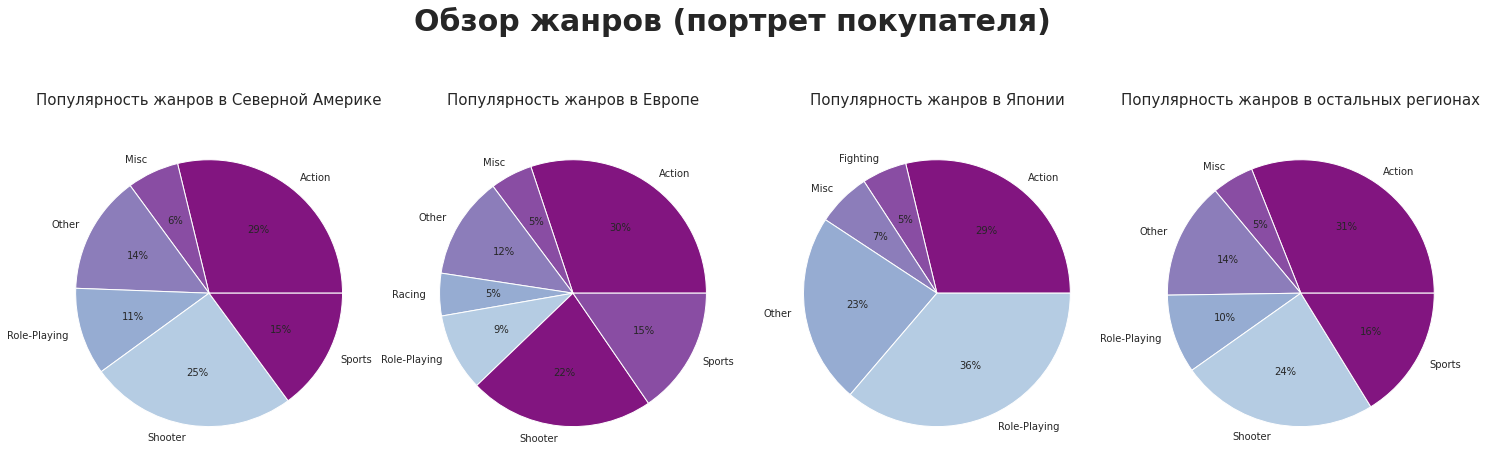

In [42]:
# создаем круговые диаграммы обзора жанров для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(25,10)) # параметры графика
for i in range(len(reg)):
    # сводная таблица по нужным данным
    reg_data = data_act.groupby('genre').agg({reg[i]:'sum'}).reset_index()
    reg_data['perc'] = reg_data[reg[i]] / reg_data[reg[i]].sum()
    reg_data.loc[reg_data['perc']<=0.05, 'genre'] = 'Other'
    reg_data = reg_data.groupby('genre').agg({reg[i]:'sum'}).reset_index()
    # график на основе сводной таблицы
    plt.subplot(1, 4, i+1)
    plt.pie(reg_data[reg[i]], labels=reg_data['genre'], autopct='%.0f%%', radius=1.1, colors=colors)
    # подписи к каждому графику
    plt.title('Популярность жанров в '+ reg_tit[i], y=1.1, fontsize=15)
#общая подпись для графика
fig.suptitle('Обзор жанров (портрет покупателя)', fontsize=30, y=0.9, weight='demi')
plt.show()

**Регион NA:** Преобладает жанр `Action`, на втором месте по популярности `Shooter`. Самый непопулярный жанр из пятерки - `Misc`

**Регион EU:** Ситуация схожая с Северной Америкой. Преобладает `Acrtion`, на втором месте - `Shooter`, однако самый непопулярный жанр из пятерки - `Racing`

**Регион JP:** Здесь совершенно другая ситуация. Самый популярный жанр - `Role-Playing`, на втором месте - `Action`, при этом самый непопулярный жанр из пятерки - `Shooter`. Вероятно, такая ситуация связана с культурными особенностями региона.

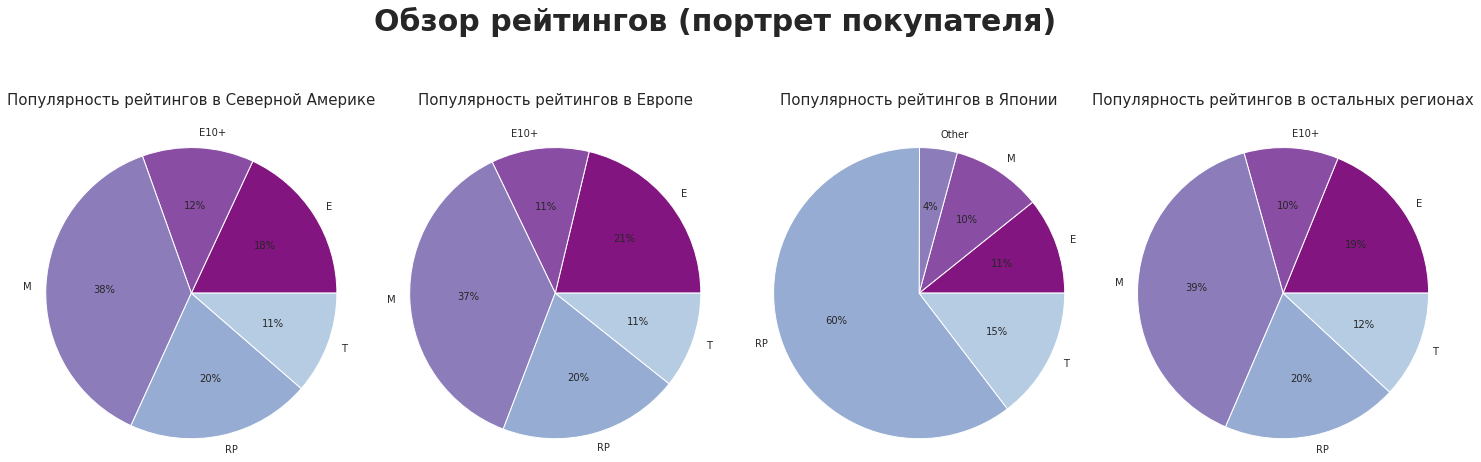

In [43]:
# создаем круговые диаграммы обзора рейтингов для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(25,10)) # параметры графика
for i in range(len(reg)):
    # сводная таблица по нужным данным
    reg_data = data_act.groupby('rating').agg({reg[i]:'sum'}).reset_index()
    reg_data['perc'] = reg_data[reg[i]] / reg_data[reg[i]].sum()
    reg_data.loc[reg_data['perc']<=0.05, 'rating'] = 'Other'
    reg_data = reg_data.groupby('rating').agg({reg[i]:'sum'}).reset_index()
    # график на основе сводной таблицы
    plt.subplot(1, 4, i+1)
    plt.pie(reg_data[reg[i]], labels=reg_data['rating'], autopct='%.0f%%', radius=1.2, colors=colors)
    # подписи к каждому графику
    plt.title('Популярность рейтингов в '+ reg_tit[i], y=1.1, fontsize=15)
#общая подпись для графика
fig.suptitle('Обзор рейтингов (портрет покупателя)', fontsize=30, y=0.9, weight='demi')
plt.show()

**Регион NA:** Преобладает рейтинг `M`. Это можно связать с жанрами игр, которые предпочитают в этом регионе: игры в жанрах `Action` и `Shooter` обычно высокорейтинговые. Игры с рейтингом `T` меньше всего популярны в регионе.

**Регион EU:** Здесь ситуация схожая с Северной Америкой: самый популярный рейтинг - `M`, наименее популярные рейтинги - `T` и `E10+`.

**Регион JP:** В Японии самый популярный рейтинг игр - `RP`. Возможно это какие-то кастомныые игры. На втором месте по популярности рейтинг `T`. Самый непопулярный рейтинг из пятерки здесь `E10+`, также стоит отметить, что здесь не популярен рейтинг `M`. Это может быть связано с культурными особенностями региона.

**Портрет типичного пользователя в каждом регионе**

**Регион NA:** Предпочитает играть в игры на `PS4` в жанре `Action` с рейтингом `M`

**Регион EU:** Предпочитает играть в игры на `PS4` в жанре `Action` с рейтингом `M`

**Регион JP:** Предпочитает играть в игры на `3DS` в жанре `Role-Playing` с рейтингом `T` или `RP`

В целом можно сказать, что рынки в Северной Америке и в Европе очень похожи, а вот рынок Японии значительно от них отличается. При выпуске игр стоит учитывать культурные особенности каждого региона.

**Вывод:**

Во время исследовательского анализа данных было выполнено:
- исследование платформ, динамики продаж на протяжении всего периода;
- был выбран и проанализирован актуальный период для прогнозирования на 2017 год (2013-2016гг.);
- была выявлена небольшая зависимость продаж от отзывов критиков и отсутствие зависимости продаж от отзывов пользователей;
- был выявлен наиболее популярный жанр игр в актуальной периоде - `Shooter` и самый непопулярный - `Adventure`;
- были составлены портреты типичного пользователя в каждом из регионов.

<a id ='4'></a>
## Проверка гипотез

*1. Проверим первую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H₁: Средние пользовательские рейтинги платформ Xbox One и PC разные

Для проверки этой гипотезы правильно использовать критерий для равенства двух генеральных совокупностей - `scipy.stats.ttest_ind()`, так как мы сравниваем средние двух независимых совокупностей: рейтинги платформ Xbox One и PC.

Для начала выясним, каким должен быть параметр `equal_var` в этом тесте

In [44]:
# удаляем нулевые значения из актуальных данных для проверки гипотез
data_act_dropna = data_act.dropna()
data_act_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             976 non-null    object 
 1   platform         976 non-null    object 
 2   year_of_release  976 non-null    int64  
 3   genre            976 non-null    object 
 4   na_sales         976 non-null    float64
 5   eu_sales         976 non-null    float64
 6   jp_sales         976 non-null    float64
 7   other_sales      976 non-null    float64
 8   critic_score     976 non-null    float64
 9   user_score       976 non-null    float64
 10  rating           976 non-null    object 
 11  total_sales      976 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 99.1+ KB


In [45]:
# если размер любой из совокупностей превышает размер другой совокупности более, чем на 10, equal_var=False
if (abs(len(data_act_dropna[data_act_dropna['platform']=='PS4']) -
        len(data_act_dropna[data_act_dropna['platform']=='XOne'])) > 10):
    print('Параметр equal_var должен быть False')
else:
    print('Параметр equal_var должен быть True')

Параметр equal_var должен быть False


In [46]:
# уровень стат. значимости 5%
alpha = 0.05
# t-test
result = (st.ttest_ind(data_act_dropna[data_act_dropna['platform']=='PS4']['user_score'],
                       data_act_dropna[data_act_dropna['platform']=='XOne']['user_score'],
                       equal_var=False))

print(f'p-value: {result.pvalue}')
          
if result.pvalue < alpha:
    print('Нулевая гипотеза отвергается в пользу альтернативной гипотезы')
else:
    print('Нельзя отвергнуть нулевую гипотезу')

p-value: 0.12950828207699414
Нельзя отвергнуть нулевую гипотезу


Полученное значение p-value нам говорит о том, что при условии того, что средние пользовательские рейтинги платформ Xbox One и PC разные, получить такое или большее различие случайно можно с вероятностью в 13%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательсикми рейтингами платформ.

Нулевую гипотезу отвергнуть нельзя, то есть мы не имеем статистически значимых доказательств в пользу того, что средние пользовательские рейтинги платформ Xbox One и PC разные.

In [47]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


*2. Проверим вторую гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H₁: Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки этой гипотезы правильно использовать критерий для равенства двух генеральных совокупностей - `scipy.stats.ttest_ind()`, так как мы сравниваем средние двух независимых совокупностей: пользовательские рейтинги жанров Action и Sports.

Для начала выясним, каким должен быть параметр `equal_var` в этом тесте

In [48]:
# если размер любой из совокупностей превышает размер другой совокупности более, чем на 10, equal_var=False
if (abs(len(data_act_dropna[data_act_dropna['genre']=='Action']) -
        len(data_act_dropna[data_act_dropna['genre']=='Sports'])) > 10):
    print('Параметр equal_var должен быть False')
else:
    print('Параметр equal_var должен быть True')

Параметр equal_var должен быть False


In [49]:
# t-test
result = (st.ttest_ind(data_act_dropna[data_act_dropna['genre']=='Action']['user_score'],
                       data_act_dropna[data_act_dropna['genre']=='Sports']['user_score'],
                       equal_var=False))

print(f'p-value: {result.pvalue}')

if result.pvalue < alpha:
    print('Нулевая гипотеза отвергается в пользу альтернативной гипотезы')
else:
    print('Нельзя отвергнуть нулевую гипотезу')

p-value: 1.0496920005008588e-13
Нулевая гипотеза отвергается в пользу альтернативной гипотезы


Полученное значение p-value нам говорит о том, что при условии, что средние пользовательские рейтинги жанров Action и Sports разные, получить такое или большее различие случайно можно с очень маленькой вероятностью (ниже 0.01%). Этой вероятность слишком мала для того, чтобы делать вывод об отсутствии разницы между средними пользовательскими рейтингами жанров Action и Sports.

Нулевая гипотеза отвергнута в пользу альтернативной: предположительно, cредние пользовательские рейтинги жанров Action и Sports разные. Это может означать, что при прогнозировании нам стоит учитывать, какого жанра планируется выпускаемая игра для того, чтобы понять, какие будут пользовательские рейтинги у игры в будущем.

<a id ='5'></a>
## Общий вывод

Во время выполнения проекта было выполнено следующее:

**1. Обзор данных**

**2. Предобработка данных**
- Скорректированы названия столбцов (приведены к нижнему регистру);
- обработаны найденые дубикаты;
- обработаны пропуски там, где это было возможно:

Малочисленые пропуски в столбцах `name`, `genre` и `year_of_release` были удалены, пропуски в столбцах `critic_score` и `user_score` оставлены за невозможностью их замены, пропуски в столбце `rating` были заменены на `RP` ('Rating Pending')
- скорректирован тип данных у некоторых столбцов;
- добавлен столбец с глобальными продажами для каждой игры;

**3. Исследовательский анализ данных**
- проанализированы данные за весь период и выбран актуальный период для прогнозирования на 2017 год:

Было выявлено, что до 2003 года игры выпускались редко, пик выпуска игр пришелся на 2008-2009 года (около 1500 игр), а далее снова пошло снижение до 700-800 игр в год.

Были найдены самые популряные платформы за весь период (`PS2`, `X360`, `PS3`), а также проанализированы продажи 10 наиболее популярных платформ за весь исследуемый период. Средний срок жизни платформы составил в среднем 8 лет. На основе этого был выбран актуальный период для прогнозирования на 2017 год: 2013-2016 года.

- проведен анализ актуального периода:

В целом продажи всех исследуемых платформ к концу актуального периода года снизились, однако были выявлены потенциально прибыльные компании (`PS4`, `XOne`, `3DS`)

- проанализирована зависимость между продажами и отзывами:

На основе анализа данных по нескольким популярным платформам установилось, что существует небольшая зависимость продаж игр от отзывов критиков, в то время как зависимости между продажами и отзывами пользователей было не обнаружено

- проанализирована зависимость между жанром игры и ее продажами:

Продажи зависят от жанра игры, при этом самый популярный жанр в актуальном периоде `Shooter` и `Action`(занимает около 30% рынка в каждом из регионов), а самый непопулярный - `Adventure`

- составлены портреты типичного пользователя в каждом регионе:

Портреты типичного пользователя в Северной Америке и Европе совпадают, а вот портрет типичного пользователя в Японии имеет свои особенности, которые непременно стоит учитывать при продаже игр для этого региона

**4. Проверка гипотез**

- средние пользовательские рейтинги платформ Xbox One и PC равные;
- средние пользовательские рейтинги жанров Action и Sports разные.
***
Успешность игры зависит от платформы, на которой она выпускается, жанра и оценок критиков.
***

**Потенциально успешная игра в 2017 году должна быть:**
- Выпущена для платформы `PS4`, `XOne` или же `3DS`;
- в жанре `Action`;
- с ESRB рейтингом `M` или же `E`;
- с высокими оценками критиков.